In [67]:
import os

image_name = "4(u)_1_-1_-1_HS_905_03_front.png"

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
folder_path = os.path.join(parent_dir, "Cuneiform Tests", "MaiCuBeDa", "MaiCuBeDa_Annotations_MSII","char")


image_path = os.path.join(folder_path, image_name)

print(image_path)

/Users/Uni/Documents/Uni/Thesis/Cuneiform Tests/MaiCuBeDa/MaiCuBeDa_Annotations_MSII/char/4(u)_1_-1_-1_HS_905_03_front.png


In [68]:
from matplotlib import pyplot as plt

def display_image(image):
    plt.imshow(image, cmap='gray')
    plt.show()

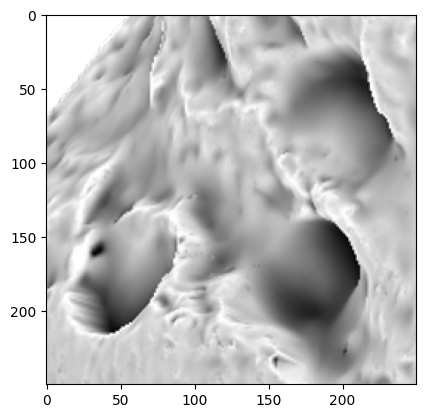

In [69]:
# load image at image_path while preserving transparency
image = plt.imread(image_path)
display_image(image)

In [70]:
# determine whether the image has transparennt pixels (alpha == 100%)
import numpy as np

def has_transparent_pixels(image):
    alpha_channel = image[:, :, 3]  # Extract the alpha channel
    return np.any(alpha_channel < 1.0), alpha_channel  # Check if any pixel has alpha less than 1.0

In [71]:
# for all images at folder path, check if they have transparency
image_stack = os.listdir(folder_path)

opaque_stack = []

for image_name in image_stack:
    image_path = os.path.join(folder_path, image_name)
    image = plt.imread(image_path)
    is_transparent, alpha = has_transparent_pixels(image)
    if not is_transparent:
        opaque_stack.append(image_name)

print(opaque_stack)



['a_1_3_3_HS_385_03_front.png', 'ba_1_6_4_HS_1285_03_front.png', 'gan2_1_9_3_HS_1123_03_front.png', 'dab5_1_1_2_HS_2297_06_back.png', 'szunigin_1_3_1_HS_1175_06_back.png', 'dab5_1_3_4_HS_2285_03_front.png', 'a_1_4_2_HS_1149_03_front.png', 'dam_1_3_2_HS_866_03_front.png', 'u2_1_1_5_HS_1153_03_front.png', 'ra_1_2_4_HS_2106_03_front.png', '1(disz)_1_4_4_HS_2106_06_back.png', 'iti_1_2_1_HS_2287_06_back.png', 'usz_1_18_2_HS_1271_03_front.png', 'i_1_3_3_HS_1058_06_back.png', 'al_1_1_9_HS_1215_06_back.png', 'sag11_1_3_3_HS_1086_06_back.png', '6(asz@c)_1_-1_-1_HS_806_06_back.png', 'udu_1_2_2_HS_2440_03_front.png', 'la_1_4_2_HS_2015_06_back.png', 'ba_2_1_2_HS_1271_03_front.png', 'us2_3_3_2_HS_808_03_front.png', 'mu_1_4_1_HS_1150_06_back.png', 'gur_1_3_4_HS_876_03_front.png', 'a_1_1_1_HS_1299_06_back.png', 'a_1_5_5_HS_307_03_front.png', 'ba_1_-1_-1_HS_1012_06_back.png', 'me_1_7_5_HS_1283_06_back.png', 'ku6_1_2_4_HS_869_06_back.png', '1(asz@c)_1_4_1_HS_843_03_front.png', 'ma_2_3_2_HS_932_03_front

In [72]:
import pandas as pd

print(len(opaque_stack))
df_images = pd.DataFrame(opaque_stack, columns=["filename"])
df_images.head(5)

23311


,filename
0,a_1_3_3_HS_385_03_front.png
1,ba_1_6_4_HS_1285_03_front.png
2,gan2_1_9_3_HS_1123_03_front.png
3,dab5_1_1_2_HS_2297_06_back.png
4,szunigin_1_3_1_HS_1175_06_back.png


In [73]:
# create new column "char" in df_images from filenames
df_images["char"] = df_images["filename"].str.split("_")

size_before = df_images.filename.size

for index, row in df_images.iterrows():
    # if first elem is a number than merge with second elem
    if row["char"][0].isdigit():
        # keep only transliteration (elem 1-2)
        df_images.at[index, "char"] = row["char"][0] + "-" + row["char"][1]
    else:
        df_images.at[index, "char"] = row["char"][0]
    # files not containing a transliteration are not needed:
    if row["char"][0] == "":
        df_images = df_images.drop(index)

size_after = df_images.filename.size
print("No. of removed rows:\t", size_before - size_after)
print("No. of remaining rows:\t", size_after)

df_images.head(5)

No. of removed rows:	 25
No. of remaining rows:	 23286


,filename,char
0,a_1_3_3_HS_385_03_front.png,a
1,ba_1_6_4_HS_1285_03_front.png,ba
2,gan2_1_9_3_HS_1123_03_front.png,gan2
3,dab5_1_1_2_HS_2297_06_back.png,dab5
4,szunigin_1_3_1_HS_1175_06_back.png,szunigin
5,dab5_1_3_4_HS_2285_03_front.png,dab5
6,a_1_4_2_HS_1149_03_front.png,a
7,dam_1_3_2_HS_866_03_front.png,dam
8,u2_1_1_5_HS_1153_03_front.png,u2
9,ra_1_2_4_HS_2106_03_front.png,ra


In [76]:
# if not yet existing, create folder called "imgset" contraining all images referenced in df_images
imgset_path = os.path.join(parent_dir, "Cuneiform Tests", "imgset")
if not os.path.exists(imgset_path):
    os.makedirs(imgset_path)
    print("Folder 'imgset' created.")

    # for each image in df_images, copy image to imgset folder naming it by char
    for index, row in df_images.iterrows():
        image_path = os.path.join(folder_path, row["filename"])
        image = plt.imread(image_path)
        image_name = str(index) + "_" + row["char"] + ".png"
        image_path = os.path.join(imgset_path, image_name)
        plt.imsave(image_path, image)

img_folder = os.path.join(parent_dir, "Cuneiform Tests", "imgset")
img_stack = os.listdir(img_folder)

Folder 'imgset' created.
